In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split    
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

### **Load the dataset**

In [2]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### **Display basic information**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### **segregate numerical and categorical columns**

In [6]:
numerical_columns=df.columns[df.dtypes!='object'].tolist()
categorical_columns=df.columns[df.dtypes=='object'].tolist()
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension', 'target']
Categorical Columns: []


### **Check for missing values**

In [7]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

### **Check for duplicated records**

In [8]:
df.duplicated().sum()

np.int64(0)

### **Correlation Analysis**

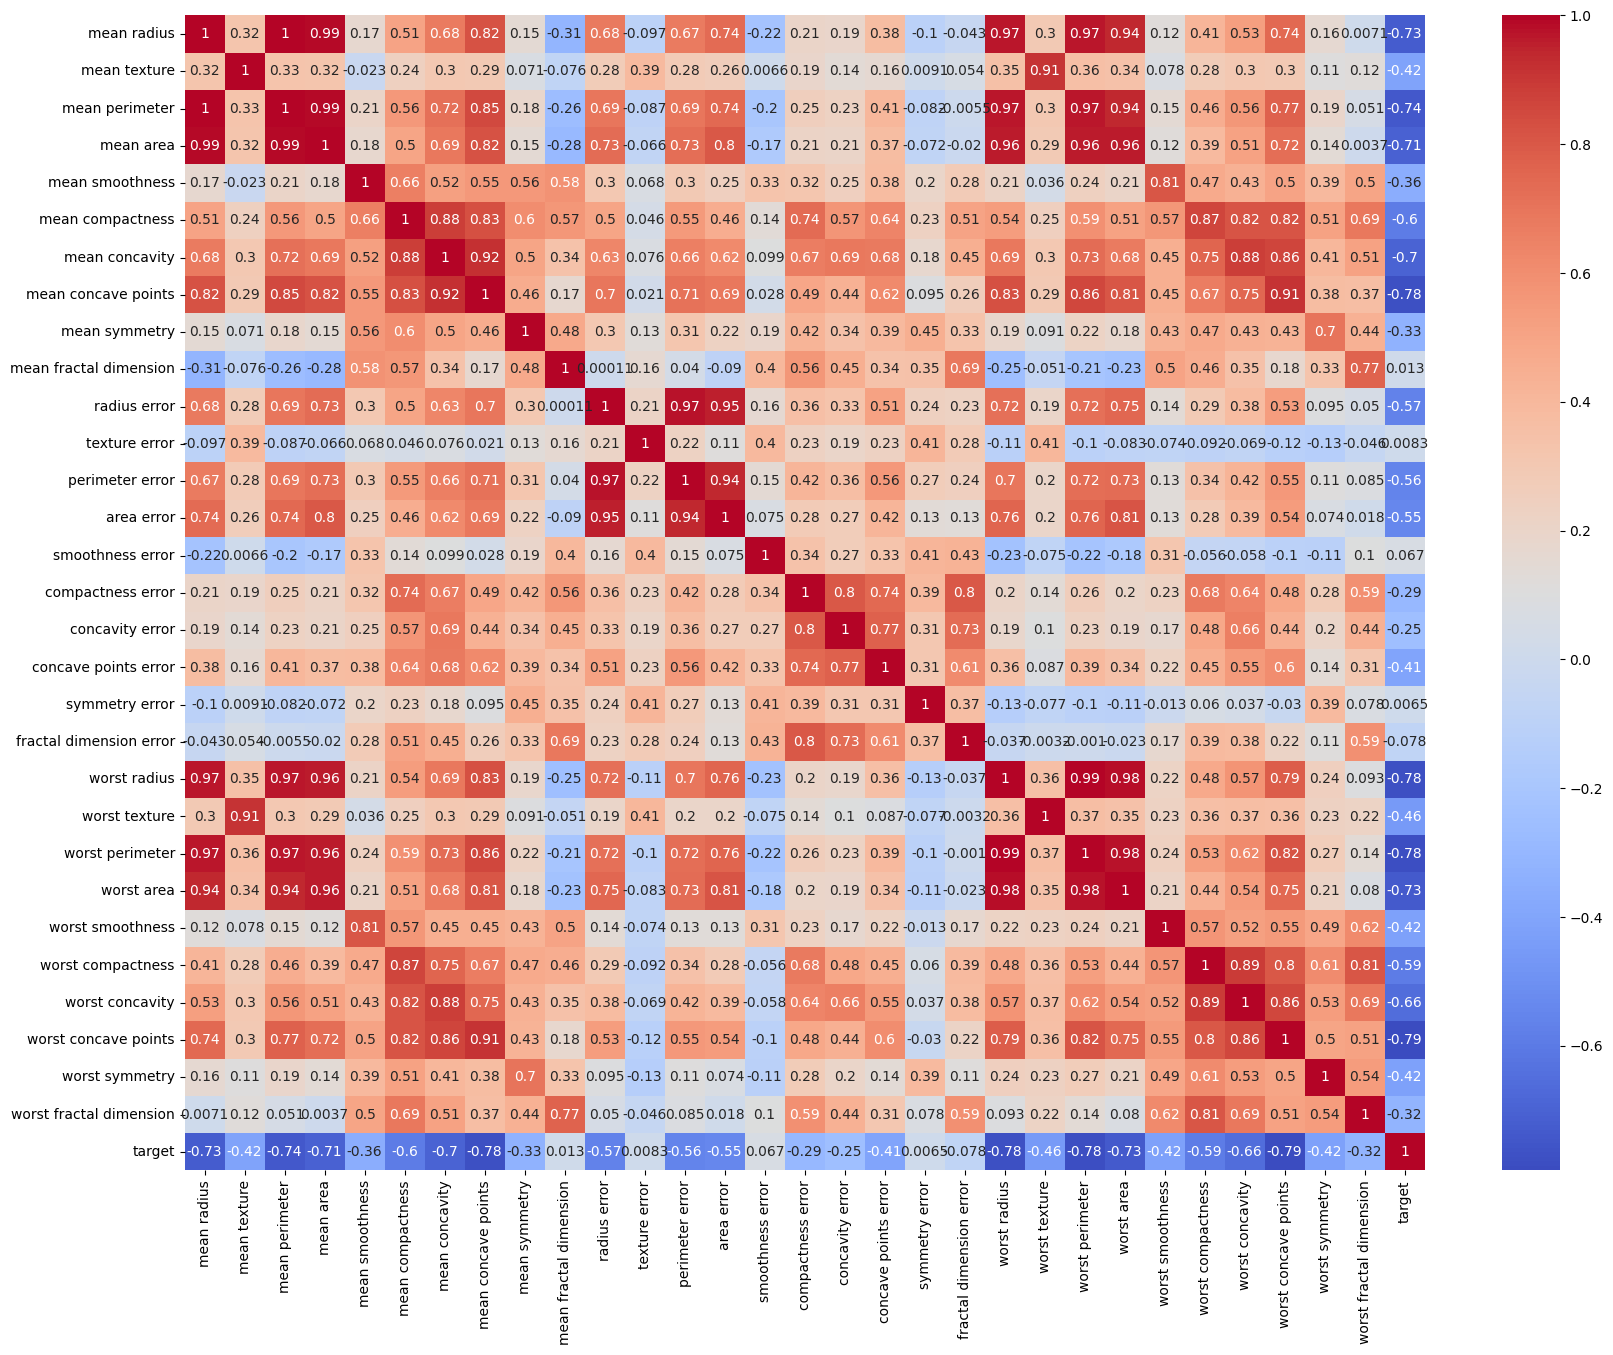

In [9]:
# Correlation matrix
plt.figure(figsize=(20, 15))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### **Distribution of Features**

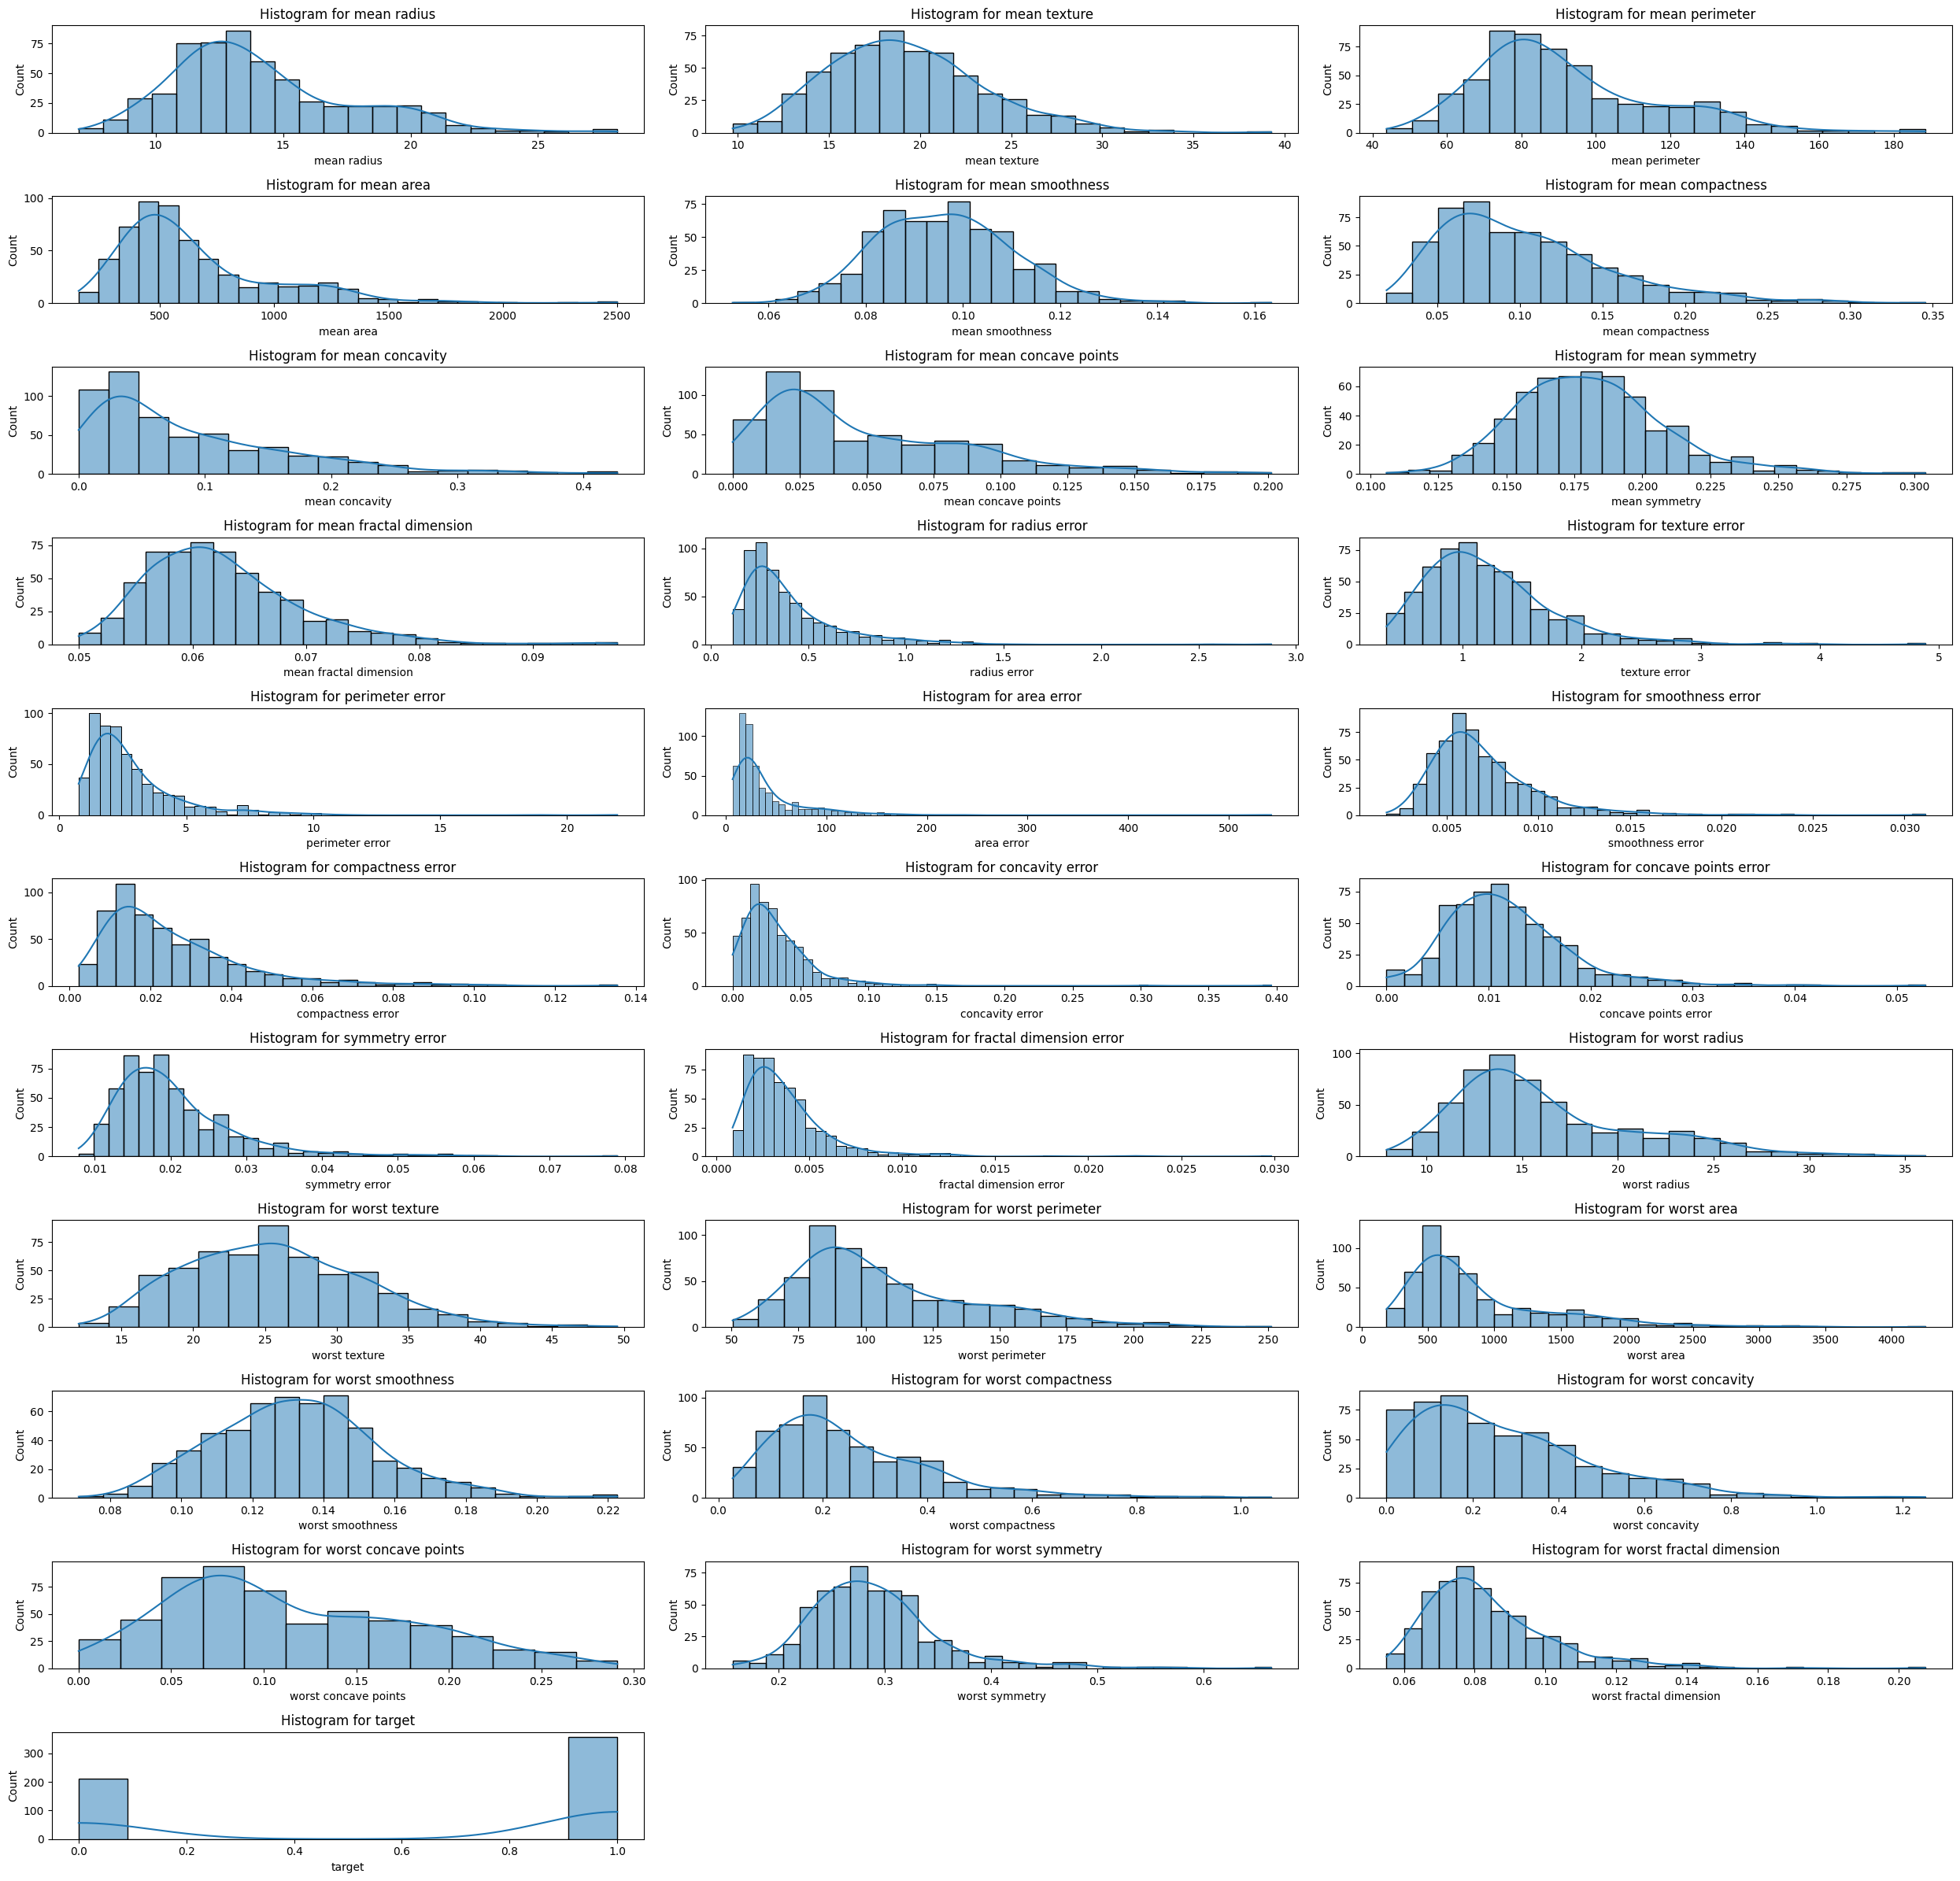

In [10]:
# Setting up the plot
plt.figure(figsize=(25, 24))
x = 0

# Creating histograms for each numerical column
for i, col in enumerate(numerical_columns):
    plt.subplot(11, 3, i+1)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histogram for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

# Displaying the plot
plt.tight_layout()
plt.show()

### **Visualizing Relationships**

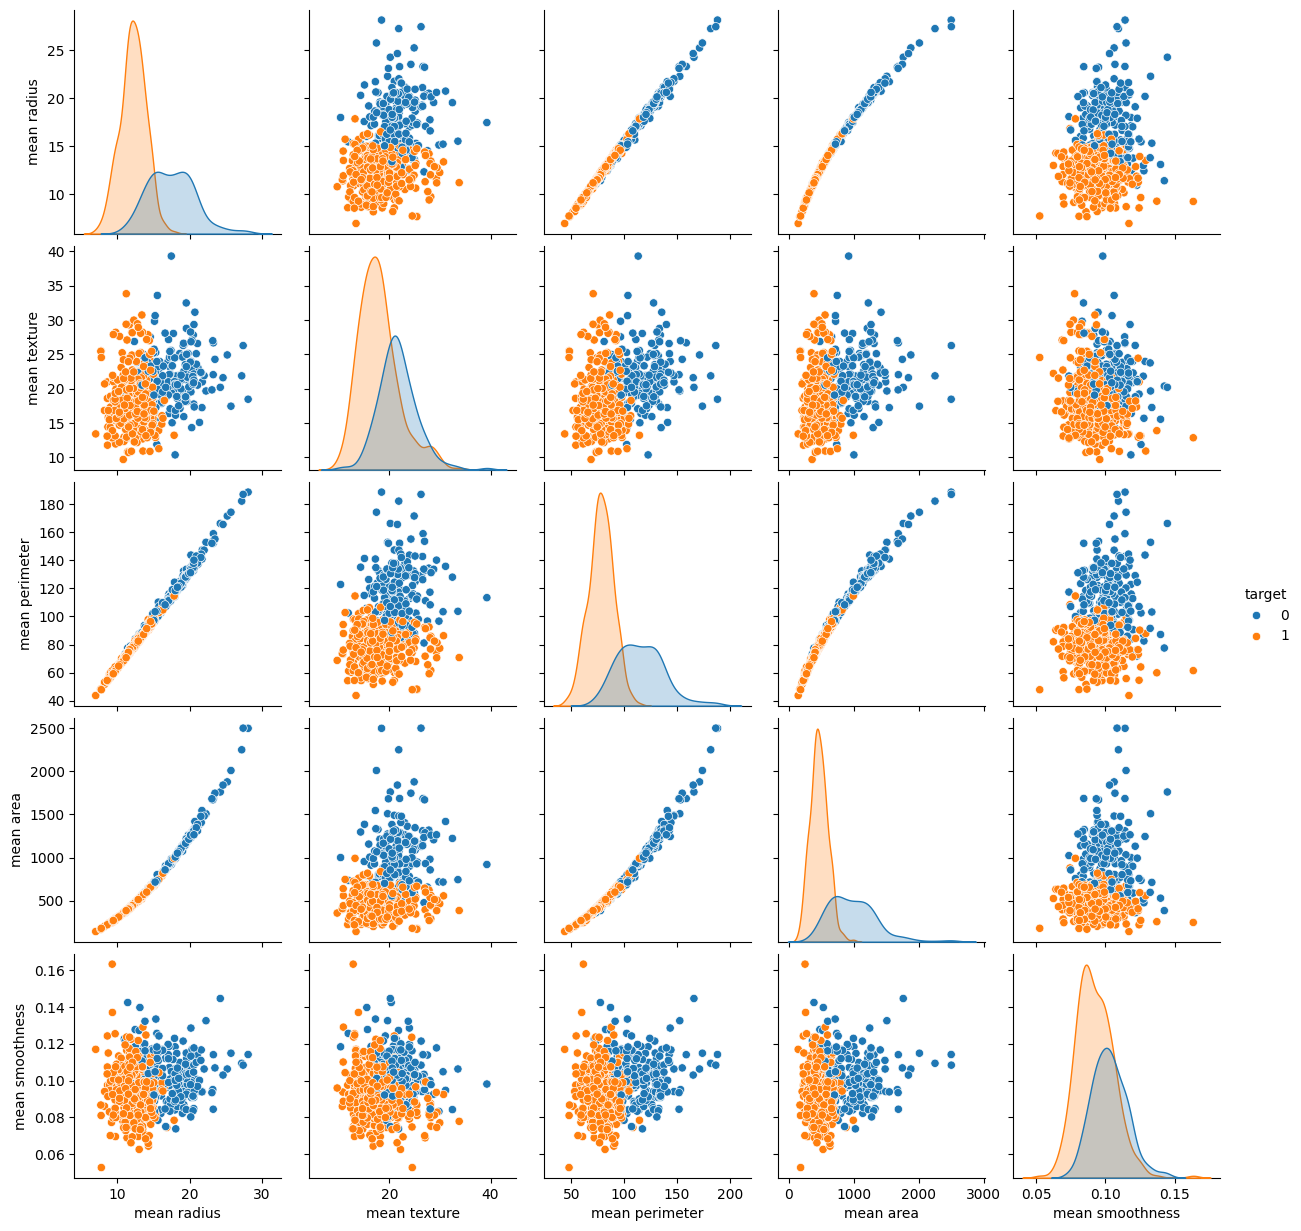

In [11]:
# Pairplot
sns.pairplot(df, hue='target', vars=data.feature_names[:5])  # Limiting to first 5 features for better visualization
plt.show()

### **Independent and dependent features**

In [12]:
X = df.drop('target',axis=1)
Y = df['target']

### **Train test split**

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)

In [14]:
# Define numerical columns (adjust as per your dataset)
num_columns = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

### **Pipelines**

In [15]:
# Numerical Pipeline
num_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

# Define the preprocessor with only the numerical pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipeline', num_pipeline, num_columns)
    ]
)

In [16]:
# Fit and transform the training data
X_train_transformed = pd.DataFrame(preprocessor.fit_transform(X_train), columns=preprocessor.get_feature_names_out())

# Transform the test data
X_test_transformed = pd.DataFrame(preprocessor.transform(X_test), columns=preprocessor.get_feature_names_out())

In [17]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [18]:
regression.coef_

array([ 3.17785941e-01,  6.25308513e-04, -2.85493120e-02, -6.46404202e-04,
        2.85990976e-01,  3.67153728e+00, -1.25209934e+00, -3.48082597e+00,
        1.00417522e+00,  1.21555491e+00, -1.50368937e-01,  5.04765596e-02,
       -3.82345429e-03,  4.50893533e-04, -2.25045573e+01,  4.22302123e-01,
        4.08268631e+00, -1.12586750e+01, -5.99100769e-01,  2.55630243e+00,
       -2.44080218e-01, -1.05190291e-02,  3.97290076e-03,  1.13750432e-03,
        2.34185785e-01,  1.67604690e-01, -4.13922311e-01, -1.54788900e-01,
       -1.04873625e+00, -4.82862878e+00])

In [19]:
regression.intercept_

np.float64(2.5175680745218383)

### **Train multiple models**

In [20]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

### **Model Ecaluation**

In [21]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR()
}

trained_model_list = []
model_list = []
r2_list = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae, rmse, r2_square = evaluate_model(y_test, y_pred)
    
    print(model_name)
    print("RMSE:", rmse)
    print("MAE:", mae)
    print("R2 score:", r2_square * 100)

    r2_list.append(r2_square)
    model_list.append(model_name)

    print('=' * 35)
    print('\n')


Linear Regression
RMSE: 0.24717751503596375
MAE: 0.18921899218835772
R2 score: 73.5642304718755


Lasso
RMSE: 0.30599077639179
MAE: 0.2362757519358294
R2 score: 59.4873451097848


Ridge
RMSE: 0.24744351769438908
MAE: 0.19063539493861556
R2 score: 73.5073015983659


ElasticNet
RMSE: 0.28526149898346187
MAE: 0.22185827976774736
R2 score: 64.79045982743696


Random Forest
RMSE: 0.17753181083864694
MAE: 0.06625730994152046
R2 score: 86.36276265167209


SVR
RMSE: 0.24222881511824693
MAE: 0.13718826159581446
R2 score: 74.61216641221307


